# 直感でデータを読むこわさ
## １　はじめに
　本稿では、直感でデータを読むと読み間違えやすいテーマをいくつか挙げる。もちろん、大体においては直感は正しいのだが、100%依存すると過つことがあるということは知っておく意味がある。
### １．１　ついでに
　本稿に限らず、可能な限り説明にはPythonというプログラム言語を用いた例を示すように努める。これはこの言語を習得してほしいという趣旨ではない。本文の内容があまりにつまらなく、コメントの価値もないという場合に、プログラムにどのような改善の余地があるかを考えてもらえれば、退屈も少なくなるのではないかと考えてのことである。プログラム言語部分がわからなくとも理解できるペーパーを目指している。他方、プログラム部分には、読んだもらえる人のために過剰にコメントを入れておくことがある。過少である場合は筆者のミスだが、過剰である場合は意図的である。

## ２　平均値と中央値
　統計学を学ぶと最初に出てくるのは平均値である。そして、平均値だけではデータの状態の全てを知ることはできないということが説明され、中央値の説明となる。平均値を与えられると直感的にそれがおおむね中央値でもあるように思いこむがそれは多くの場合現実とは異なっている。

In [1]:
import pandas as pd
df=pd.DataFrame([['大津',57891],['彦根',25959],['長浜',24112],['近江八幡',39936],['草津',56351],
                 ['水口',23248],['今津',8862],
                 
                 ['上京',37539],['左京',32486],['中京',23537],['東山',27932],['下京',31172],
                 ['右京',82907],['伏見',40374],['福知山',15972],['舞鶴',11212],['宇治',96926],
                 ['宮津',7699],['峰山',10373],
                 
                 ['大阪福島',23013],['西',19051],['港',21055],['天王寺',16488],['浪速',9898],
                 ['西淀川',13061],['東成',13271],['生野',19466],['旭',33063],['城東',41693],
                 ['阿倍野',21411],['住吉',40405],['東住吉',47905],['西成',11963],['東淀川',49326],
                 ['北',13931],['大淀',16608],['東',14651],['南',11523],['堺',129812],
                 ['岸和田',42334],['豊能',121621],['吹田',77298],['泉大津',49644],['枚方',113326],
                 ['茨木',110484],['八尾',70865],['泉佐野',44545],['富田林',82534],['門真',64886],
                 ['東大阪',74424],
                 
                 ['灘',24754],['兵庫',71957],['長田',15305],['須磨',62101],['神戸',28341],
                 ['姫路',88467],['尼崎',68331],['明石',87700],['西宮',132895],['洲本',27965],
                 ['芦屋',65519],['伊丹',64275],['相生',20334],['豊岡',22650],['加古川',66997],
                 ['龍野',27742],['西脇',11081],['三木',14474],['社',22830],['和田山',10923],
                 ['柏原',20602],
                 
                 ['奈良',125357],['葛城',78430],['桜井',25276],['吉野',7715],
                 
                 ['和歌山',57446],['海南',10177],['御坊',13837],['田辺',21064],['新宮',12212],
                 ['粉河',34229],['湯浅',13440]])

確定申告者数平均： 41810.59756097561
確定申告者数中央値： 27948.5
平均は中央値の何倍か： 1.4959871750174647 倍


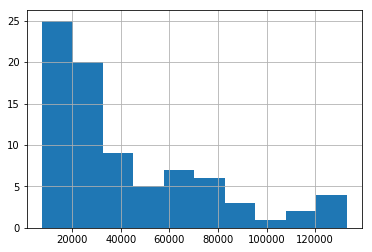

In [2]:
%matplotlib inline
df.columns=["署名","確定申告者数"]
df["確定申告者数"].hist()
#平均、中央値1
print('確定申告者数平均：',df["確定申告者数"].mean())
print('確定申告者数中央値：',df["確定申告者数"].median())
print('平均は中央値の何倍か：',df["確定申告者数"].mean()/df["確定申告者数"].median(),'倍')

もちろん、何を考えるのかで話は異なるのだが、署の確定申告者数を全署の平均でイメージするのは署の代表的な姿をとらえるうえでは適当ではなさそうである。平均値は中央値の1.5倍という大きさである。ヒストグラムを見ると平均値の4万1千人程度というのはむしろ少数派の署である。では、中央値で考えるといいのかということだが、ヒストグラムを見るとそれでもやや無理があり、例えば、2万人程度、7万人程度、11万人程度の3つのグループに分けて考えるのがよさそうに見える。

## ３　シンプソンのパラドックス
　パラドックスと言っている時点で落ちが見えているのが残念だが、次のような例を考えてほしい。

　A署X部門の上半期の成績が$\frac{34}{37}$、Y部門の上半期の成績が$\frac{18}{19}$であり、下期の成績はX部門が$\frac{4}{12}$、Y部門が$\frac{16}{28}$であったとする。どちらの部門の成績が良いであろうか。
 
  上半期、X部門は91.9%の成績、Y部門は94.7%の成績である。下半期は、X部門33.3%、Y部門57.1%の成績である。

　では、総合成績はどうなるか。X部門は、$\frac{38}{49}$、Y部門は$\frac{34}{47}$である。パーセント表示すると、77.6%と72.3%となる。

### 追加の説明
　しつこいようだが、そして、上記と内容的にはほとんど変わらないが、まず、何が起こっているかをもう一度説明する。上記の数字をもう一度見てみよう。上半期の成績を比べると、Y部門の方がよい。
 疑われる向きは、$\frac{34}{37}$と$\frac{18}{19}$を手元で計算してみてほしい。上記で書いている通りY部門の成績の方が良い。次に、下半期の成績を比べてみる。$\frac{4}{12}$と$\frac{16}{28}$を手元で計算してみると、Y部門の成績の方が良い。
 
 　つまり、上半期も下半期もY部門の方が成績が良いことになる。それでは、1年間を通じた成績ではX部門とY部門のどちらの成績の方が良いであろうか。直感的には当然Y部門の成績が良いと予想するのではないか。そう予想しないのは多分相当に数学的な感覚が良い人だろう。きっと胸を張ってよい。

　なぜ、間違いに引っ張られるのか。それは（私もそうだが)小学生よりも算数ができないから、つまり、分数の足し算ができないからだ。
 
 　Y部門の成績が良いと考えるのは、1年間の成績を上期と下期の成績の単純な合計と考えているからである。
  
  つまり、Y部門の成績を$\frac{18}{19}+\frac{16}{28}$  で、X部門の成績を$\frac{34}{37}+\frac{4}{12}$と考えている。
  
  丁寧に考えると、Y部門の成績は$\frac{18+16}{19+28}で、X部門の成績は$\frac{34+4}{37+12}$である。
  
  　つまり、無意識のうちに、$\frac{18}{19}+\frac{16}{28} = \frac{18+16}{19+28}$と考えている。
   
   　しかし、小学校で習った通り、$\frac{1}{2}+\frac{1}{3}$は、$\frac{1+1}{2+3}$ではない。$\frac{3}{6}+\frac{2}{6}$である。

以下の2項目は税務に関連する局面を思いつけていない。関連する局面を思いついた向きは教えていただけるとありがたい。

### 巴戦は平等か

相撲で千秋楽を迎えて予定された取り組みが終了した時点で、最多勝の力士が二人の場合、この二人で優勝決定戦が行われる。この場合、1対1であり、平等と言って大体良いであろう。最多勝の力士が三人の場合、巴戦が行われる。A,B,Cの三人が最多勝であったとすると、まずAとB、次にその勝者とCが対戦する。2連勝すると優勝ということになる。ちなみに、最多勝の力士が4人の場合、トーナメント方式で決着させることとなっている。過去最多のケースは最多勝の力士が5人で、このときは、くじで一人をシードにして、残り4人は1回戦を行い、勝者二人とシードの一人あわせて3人で巴戦という手の込んだことになる。

では、3人で巴戦を行うというのは平等と言えるだろうか。巴戦を行う場合、「〇」、「東」、「西」のくじを力士が引く。〇を引いた力士が残り、「東」、「西」を引いた力士が他の二人が最初に戦う。確率の観点から考えると○を引いた力士の優勝確率は4/14（勝率約0.286）であり他の2人は5/14（勝率約0.357）であって、○を引いた力士が不利となる。状況から見ても、「東」または「西」を引いた力士は最初の対戦で負けても、一旦控えとなって次に○を引いた力士が勝てば再び対戦できるのに対し、○を引いた力士の場合は、最初に対戦する時に負けた時点で相手力士の優勝が決まってしまう(相手は先勝しているため二連勝となる)。

### モンティホール問題

私が書きたいことをすべて書いているページがあるのでご紹介します。
https://qiita.com/jun40vn/items/f52bdfa2bc69ca8c8d75

この話は有名で、テレビ番組で紹介されたこともあり、その内容をyoutubeで見ることもできる（youtubeの著作権の取り扱いを確認していないので、リンク先は示さない）。。